In [2]:
# Initial Python environment setup...
import numpy as np # linear algebra
import pandas as pd # CSV file I/O (e.g. pd.read_csv)
import os # reading the input files we have access to

In [20]:
from haversine import haversine
# packages for mapping


In [21]:
train_df =  pd.read_csv('train.csv', nrows = 10_000_00)
train_df.dtypes

key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [22]:
train_df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [3]:
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import plotly.plotly as py
from plotly import tools
%matplotlib inline

In [24]:
train_df['pickup_datetime']= pd.to_datetime(train_df['pickup_datetime'])


In [25]:
train_df['pickup_day_of_week']=train_df['pickup_datetime'].dt.dayofweek

In [26]:
train_df['pickup_month']=train_df['pickup_datetime'].dt.month

In [27]:
train_df.tail()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_day_of_week,pickup_month
999995,2014-09-13 21:44:38.0000001,7.0,2014-09-13 21:44:38,-73.976676,40.785630,-73.959196,40.775114,1,5,9
999996,2010-09-20 14:50:37.0000002,7.3,2010-09-20 14:50:37,-73.992103,40.671385,-73.992103,40.671385,2,0,9
999997,2013-04-26 14:03:00.000000118,10.5,2013-04-26 14:03:00,-73.978423,40.751135,-73.993397,40.762197,5,4,4
999998,2011-07-08 00:29:00.00000099,6.9,2011-07-08 00:29:00,-73.980317,40.759482,-73.976832,40.743122,1,4,7
999999,2009-12-31 14:30:00.00000021,4.1,2009-12-31 14:30:00,-74.006635,40.741598,-73.999450,40.745702,1,3,12


In [28]:
train_df['pickup_date']=train_df['pickup_datetime'].dt.date

In [29]:
train_df['key'].unique()


array(['2009-06-15 17:26:21.0000001', '2010-01-05 16:52:16.0000002',
       '2011-08-18 00:35:00.00000049', ...,
       '2013-04-26 14:03:00.000000118', '2011-07-08 00:29:00.00000099',
       '2009-12-31 14:30:00.00000021'], dtype=object)

In [30]:
train_df.loc[train_df["pickup_date"] == "2009-12-31"]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_day_of_week,pickup_month,pickup_date


In [31]:
train_df.loc[train_df["key"] == "756707"]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_day_of_week,pickup_month,pickup_date


In [32]:
train_df.dtypes

key                           object
fare_amount                  float64
pickup_datetime       datetime64[ns]
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
passenger_count                int64
pickup_day_of_week             int64
pickup_month                   int64
pickup_date                   object
dtype: object

In [33]:
train_df['pickup_date'] =train_df['pickup_date'].astype(str)


In [34]:
train_df.dtypes

key                           object
fare_amount                  float64
pickup_datetime       datetime64[ns]
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
passenger_count                int64
pickup_day_of_week             int64
pickup_month                   int64
pickup_date                   object
dtype: object

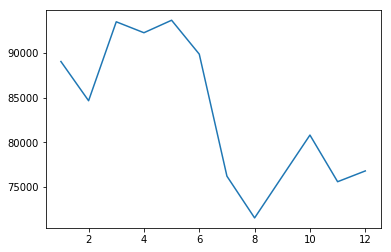

In [35]:
train_df["pickup_month"].value_counts().sort_index().plot()

In [36]:
train_df.sort_values('pickup_day_of_week', ascending = True, inplace= True)

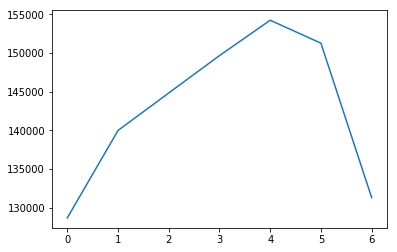

In [37]:
train_df["pickup_day_of_week"].value_counts().sort_index().plot()

In [38]:
train_df['pickup_hour']=train_df['pickup_datetime'].dt.hour

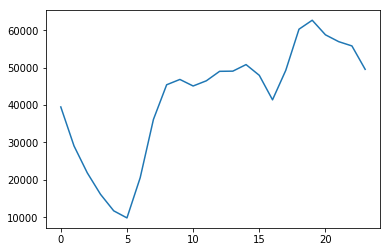

In [39]:
train_df['pickup_hour'].value_counts().sort_index().plot()

In [40]:
train_df['pickup_year']=train_df['pickup_datetime'].dt.year

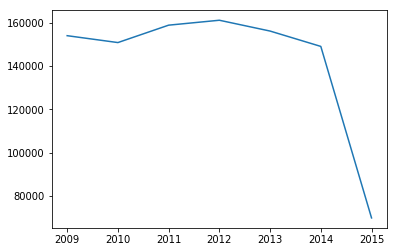

In [41]:
train_df['pickup_year'].value_counts().sort_index().plot()

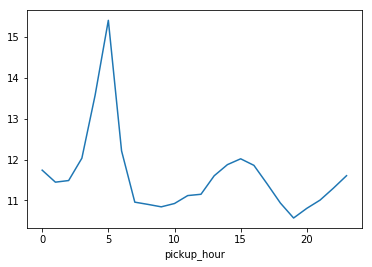

In [42]:
train_df.groupby('pickup_hour')['fare_amount'].mean().plot()

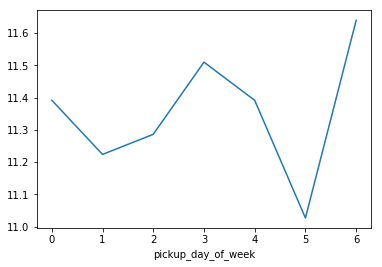

In [43]:
train_df.groupby('pickup_day_of_week')['fare_amount'].mean().plot()

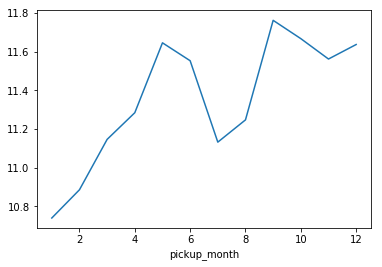

In [44]:
train_df.groupby('pickup_month')['fare_amount'].mean().plot()

In [45]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 305517
Data columns (total 13 columns):
key                   1000000 non-null object
fare_amount           1000000 non-null float64
pickup_datetime       1000000 non-null datetime64[ns]
pickup_longitude      1000000 non-null float64
pickup_latitude       1000000 non-null float64
dropoff_longitude     999990 non-null float64
dropoff_latitude      999990 non-null float64
passenger_count       1000000 non-null int64
pickup_day_of_week    1000000 non-null int64
pickup_month          1000000 non-null int64
pickup_date           1000000 non-null object
pickup_hour           1000000 non-null int64
pickup_year           1000000 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(5), object(2)
memory usage: 106.8+ MB


In [46]:
train_df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_day_of_week,pickup_month,pickup_hour,pickup_year
count,1000000.000000,1000000.000000,1000000.000000,999990.000000,999990.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,11.348079,-72.526640,39.929008,-72.527860,39.919954,1.684924,3.039856,6.267875,13.509477,2011.741106
std,9.822090,12.057937,7.626154,11.324494,8.201418,1.323911,1.949970,3.436243,6.513840,1.860754
min,-44.900000,-3377.680935,-3116.285383,-3383.296608,-3114.338567,0.000000,0.000000,1.000000,0.000000,2009.000000
25%,6.000000,-73.992060,40.734965,-73.991385,40.734046,1.000000,1.000000,3.000000,9.000000,2010.000000
50%,8.500000,-73.981792,40.752695,-73.980135,40.753166,1.000000,3.000000,6.000000,14.000000,2012.000000
75%,12.500000,-73.967094,40.767154,-73.963654,40.768129,2.000000,5.000000,9.000000,19.000000,2013.000000
max,500.000000,2522.271325,2621.628430,45.581619,1651.553433,208.000000,6.000000,12.000000,23.000000,2015.000000


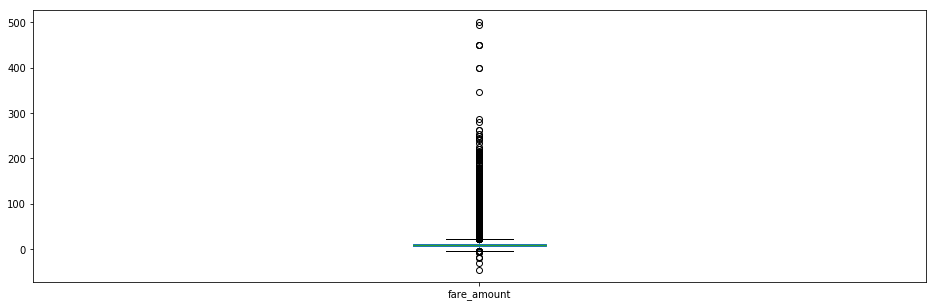

In [47]:
train_df["fare_amount"].plot.box(figsize=(16,5))  

In [48]:
train_df['id'] = train_df.index

In [49]:
new =train_df.groupby(pd.Grouper(key='pickup_datetime', freq='15T')).apply(lambda x: x['id'])

In [50]:
train_df['id'] = train_df.index

In [51]:
new

pickup_datetime            
2009-01-01 00:00:00  880228    880228
                     661006    661006
                     756707    756707
                     745620    745620
2009-01-01 00:15:00  964259    964259
                     915988    915988
2009-01-01 00:30:00  297860    297860
                     124750    124750
                     876677    876677
                     82469      82469
2009-01-01 00:45:00  124445    124445
                     973236    973236
                     965480    965480
2009-01-01 01:00:00  760438    760438
                     894290    894290
                     766885    766885
2009-01-01 01:15:00  945037    945037
                     76195      76195
                     102243    102243
                     773755    773755
                     542263    542263
2009-01-01 01:30:00  12739      12739
2009-01-01 01:45:00  709206    709206
                     307980    307980
                     674362    674362
2009-01-01 02:00:00  1

In [52]:
pd.Grouper(key='pickup_datetime', freq='15m')

TimeGrouper(key='pickup_datetime', freq=<15 * MonthEnds>, axis=0, sort=True, closed='right', label='right', how='mean', convention='e', base=0)

In [53]:
new.index.get_level_values('pickup_datetime')

DatetimeIndex(['2009-01-01 00:00:00', '2009-01-01 00:00:00',
               '2009-01-01 00:00:00', '2009-01-01 00:00:00',
               '2009-01-01 00:15:00', '2009-01-01 00:15:00',
               '2009-01-01 00:30:00', '2009-01-01 00:30:00',
               '2009-01-01 00:30:00', '2009-01-01 00:30:00',
               ...
               '2015-06-30 23:15:00', '2015-06-30 23:30:00',
               '2015-06-30 23:30:00', '2015-06-30 23:30:00',
               '2015-06-30 23:30:00', '2015-06-30 23:30:00',
               '2015-06-30 23:45:00', '2015-06-30 23:45:00',
               '2015-06-30 23:45:00', '2015-06-30 23:45:00'],
              dtype='datetime64[ns]', name='pickup_datetime', length=1000000, freq='15T')

In [54]:
train_df.loc[train_df["key"] == '799435' ]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_day_of_week,pickup_month,pickup_date,pickup_hour,pickup_year,id


In [55]:
train_df.dtypes

key                           object
fare_amount                  float64
pickup_datetime       datetime64[ns]
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
passenger_count                int64
pickup_day_of_week             int64
pickup_month                   int64
pickup_date                   object
pickup_hour                    int64
pickup_year                    int64
id                             int64
dtype: object

In [56]:
interval_df=pd.DataFrame({'interval':new.index.get_level_values(0), 'id':new.index.get_level_values(1)})

In [57]:
new.index.get_level_values(1)

Int64Index([880228, 661006, 756707, 745620, 964259, 915988, 297860, 124750,
            876677,  82469,
            ...
            182743, 506007, 751978, 240182, 323864, 286276, 955575, 915826,
            751350, 785182],
           dtype='int64', length=1000000)

In [58]:
interval_df.dtypes

interval    datetime64[ns]
id                   int64
dtype: object

In [59]:
interval_df.tail()

,interval,id
999995,2015-06-30 23:30:00,286276
999996,2015-06-30 23:45:00,955575
999997,2015-06-30 23:45:00,915826
999998,2015-06-30 23:45:00,751350
999999,2015-06-30 23:45:00,785182


In [60]:
train_df.loc[train_df["id"] == 751350]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_day_of_week,pickup_month,pickup_date,pickup_hour,pickup_year,id
751350,2015-06-30 23:53:23.0000002,3.5,2015-06-30 23:53:23,-73.97802,40.757439,-73.980705,40.753544,1,1,6,2015-06-30,23,2015,751350


In [61]:
train_df=pd.merge(train_df, interval_df, left_on = 'id', right_on = 'id', how = 'inner')

In [62]:
train_df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_day_of_week,pickup_month,pickup_date,pickup_hour,pickup_year,id,interval
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1,0,6,2009-06-15,17,2009,0,2009-06-15 17:15:00
1,2009-08-03 23:01:00.00000077,4.5,2009-08-03 23:01:00,-73.992147,40.762532,-73.984915,40.768142,5,0,8,2009-08-03,23,2009,410475,2009-08-03 23:00:00
2,2011-07-11 13:08:09.0000001,10.9,2011-07-11 13:08:09,-73.993900,40.750800,-74.014800,40.718000,1,0,7,2011-07-11,13,2011,410487,2011-07-11 13:00:00
3,2012-12-17 22:58:00.000000163,29.0,2012-12-17 22:58:00,-73.979827,40.766015,-73.962497,40.677382,3,0,12,2012-12-17,22,2012,410491,2012-12-17 22:45:00
4,2011-02-28 22:03:00.000000115,6.1,2011-02-28 22:03:00,-73.995742,40.726778,-73.978080,40.721325,1,0,2,2011-02-28,22,2011,410493,2011-02-28 22:00:00


In [63]:
train_df['interval_time']=train_df['interval'].dt.time

In [64]:
train_df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_day_of_week,pickup_month,pickup_date,pickup_hour,pickup_year,id,interval,interval_time
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1,0,6,2009-06-15,17,2009,0,2009-06-15 17:15:00,17:15:00
1,2009-08-03 23:01:00.00000077,4.5,2009-08-03 23:01:00,-73.992147,40.762532,-73.984915,40.768142,5,0,8,2009-08-03,23,2009,410475,2009-08-03 23:00:00,23:00:00
2,2011-07-11 13:08:09.0000001,10.9,2011-07-11 13:08:09,-73.993900,40.750800,-74.014800,40.718000,1,0,7,2011-07-11,13,2011,410487,2011-07-11 13:00:00,13:00:00
3,2012-12-17 22:58:00.000000163,29.0,2012-12-17 22:58:00,-73.979827,40.766015,-73.962497,40.677382,3,0,12,2012-12-17,22,2012,410491,2012-12-17 22:45:00,22:45:00
4,2011-02-28 22:03:00.000000115,6.1,2011-02-28 22:03:00,-73.995742,40.726778,-73.978080,40.721325,1,0,2,2011-02-28,22,2011,410493,2011-02-28 22:00:00,22:00:00


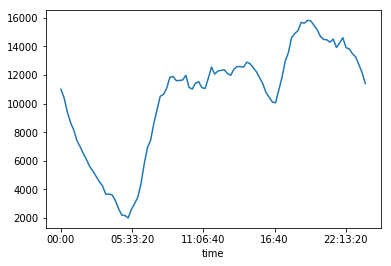

In [65]:
train_df['interval_time'].value_counts().sort_index().plot()

In [66]:
train_df["pickup_longitude"] = train_df['pickup_longitude'].apply(lambda x:round(x,2))


In [67]:
train_df["pickup_latitude"] = train_df['pickup_latitude'].apply(lambda x:round(x,2))


In [68]:
train_df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_day_of_week,pickup_month,pickup_date,pickup_hour,pickup_year,id,interval,interval_time
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21,-73.84,40.72,-73.841610,40.712278,1,0,6,2009-06-15,17,2009,0,2009-06-15 17:15:00,17:15:00
1,2009-08-03 23:01:00.00000077,4.5,2009-08-03 23:01:00,-73.99,40.76,-73.984915,40.768142,5,0,8,2009-08-03,23,2009,410475,2009-08-03 23:00:00,23:00:00
2,2011-07-11 13:08:09.0000001,10.9,2011-07-11 13:08:09,-73.99,40.75,-74.014800,40.718000,1,0,7,2011-07-11,13,2011,410487,2011-07-11 13:00:00,13:00:00
3,2012-12-17 22:58:00.000000163,29.0,2012-12-17 22:58:00,-73.98,40.77,-73.962497,40.677382,3,0,12,2012-12-17,22,2012,410491,2012-12-17 22:45:00,22:45:00
4,2011-02-28 22:03:00.000000115,6.1,2011-02-28 22:03:00,-74.00,40.73,-73.978080,40.721325,1,0,2,2011-02-28,22,2011,410493,2011-02-28 22:00:00,22:00:00


In [69]:
train_df['demand']=train_df.groupby(['interval','pickup_longitude','pickup_latitude'])['interval'].transform('count')

In [70]:
train_df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_day_of_week,pickup_month,pickup_date,pickup_hour,pickup_year,id,interval,interval_time,demand
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21,-73.84,40.72,-73.841610,40.712278,1,0,6,2009-06-15,17,2009,0,2009-06-15 17:15:00,17:15:00,1
1,2009-08-03 23:01:00.00000077,4.5,2009-08-03 23:01:00,-73.99,40.76,-73.984915,40.768142,5,0,8,2009-08-03,23,2009,410475,2009-08-03 23:00:00,23:00:00,1
2,2011-07-11 13:08:09.0000001,10.9,2011-07-11 13:08:09,-73.99,40.75,-74.014800,40.718000,1,0,7,2011-07-11,13,2011,410487,2011-07-11 13:00:00,13:00:00,3
3,2012-12-17 22:58:00.000000163,29.0,2012-12-17 22:58:00,-73.98,40.77,-73.962497,40.677382,3,0,12,2012-12-17,22,2012,410491,2012-12-17 22:45:00,22:45:00,1
4,2011-02-28 22:03:00.000000115,6.1,2011-02-28 22:03:00,-74.00,40.73,-73.978080,40.721325,1,0,2,2011-02-28,22,2011,410493,2011-02-28 22:00:00,22:00:00,1


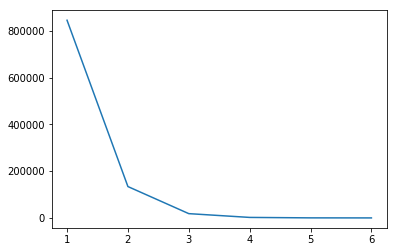

In [71]:
train_df['demand'].value_counts().sort_index().plot()

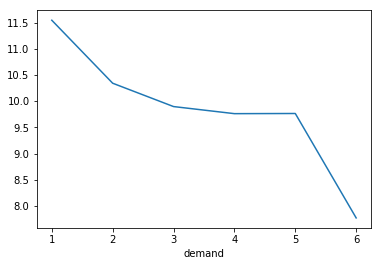

In [72]:
train_df.groupby('demand')['fare_amount'].mean().plot()

In [73]:
def distance(lat1, lon1, lat2, lon2):
    """
    calculates the Manhattan distance between 2 points using their coordinates   
    Returns
    -------
    d: float
        The Manhattan distance between the two points in kilometers
    """
    d = haversine((lat1, lon1), (lat2, lon1)) + haversine((lat2, lon1), (lat2, lon2))
    return d

# The distance is calculated in kilometers
train_df["distance"] = train_df.apply(lambda row: distance(row["pickup_latitude"], 
                                               row["pickup_longitude"], 
                                               row["dropoff_latitude"], 
                                               row["dropoff_longitude"]), axis=1)

In [74]:
train_df["distance"]

0          0.994348
1          1.333581
2          5.648338
3         11.774684
4          2.811899
5          2.236873
6          1.916328
7          2.848470
8          5.543908
9          0.307994
10         1.779232
11         9.505639
12         1.700778
13         2.724473
14         3.071089
15        21.839867
16         2.755513
17         4.304596
18         0.542047
19         0.701315
20         1.481350
21         3.030238
22         6.008949
23         2.902709
24         9.485814
25         0.582736
26         1.227529
27         4.691100
28         4.743672
29         0.000000
            ...    
999970     8.208024
999971     5.758488
999972     5.287813
999973     1.778609
999974     0.823994
999975     3.533078
999976     1.085037
999977    34.915028
999978     7.348836
999979     0.982604
999980    23.386542
999981     8.747947
999982     1.553576
999983     1.728682
999984     2.445260
999985     1.607214
999986     3.056351
999987    15.560204
999988     7.503730


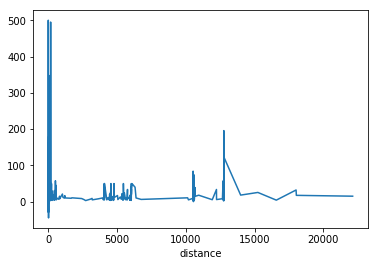

In [78]:
train_df.groupby('distance')['fare_amount'].mean().plot()

In [79]:
train_df["fare_amount"]

0          4.50
1          4.50
2         10.90
3         29.00
4          6.10
5          6.90
6          6.10
7          7.70
8          8.10
9         56.80
10         4.50
11        22.89
12         4.10
13        13.50
14         6.10
15        44.00
16         6.90
17         7.30
18         5.00
19         4.50
20         4.90
21         7.00
22        14.00
23         6.50
24        16.10
25         6.50
26         7.50
27         9.70
28        10.50
29         4.90
          ...  
999970    15.50
999971    15.00
999972    11.00
999973     7.00
999974     4.50
999975     8.90
999976     7.30
999977    57.33
999978    12.10
999979     4.90
999980    48.33
999981    15.70
999982     6.50
999983     6.50
999984     6.50
999985     5.30
999986    10.00
999987    17.30
999988    10.90
999989    10.10
999990    13.70
999991     9.50
999992    31.83
999993    19.30
999994     3.70
999995    14.90
999996    11.50
999997    24.00
999998     4.90
999999     7.50
Name: fare_amount, Lengt

In [80]:
train_df['distance'].max()

22139.91139709688

In [81]:
train_df.to_csv("train_formatted.csv")

In [82]:
train_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fare_amount,1000000.0,11.348079,9.822090,-44.900000,6.000000,8.500000,12.500000,500.000000
pickup_longitude,1000000.0,-72.526588,12.057929,-3377.680000,-73.990000,-73.980000,-73.970000,2522.270000
pickup_latitude,1000000.0,39.928901,7.626147,-3116.290000,40.730000,40.750000,40.770000,2621.630000
dropoff_longitude,999990.0,-72.527860,11.324494,-3383.296608,-73.991385,-73.980135,-73.963654,45.581619
dropoff_latitude,999990.0,39.919954,8.201418,-3114.338567,40.734046,40.753166,40.768129,1651.553433
passenger_count,1000000.0,1.684924,1.323911,0.000000,1.000000,1.000000,2.000000,208.000000
pickup_day_of_week,1000000.0,3.039856,1.949970,0.000000,1.000000,3.000000,5.000000,6.000000
pickup_month,1000000.0,6.267875,3.436243,1.000000,3.000000,6.000000,9.000000,12.000000
pickup_hour,1000000.0,13.509477,6.513840,0.000000,9.000000,14.000000,19.000000,23.000000
pickup_year,1000000.0,2011.741106,1.860754,2009.000000,2010.000000,2012.000000,2013.000000,2015.000000


In [83]:
train_df["interval"]

0        2009-06-15 17:15:00
1        2009-08-03 23:00:00
2        2011-07-11 13:00:00
3        2012-12-17 22:45:00
4        2011-02-28 22:00:00
5        2010-03-29 13:00:00
6        2012-03-26 02:00:00
7        2011-04-18 14:00:00
8        2012-07-02 22:30:00
9        2012-10-01 00:15:00
10       2009-09-21 20:45:00
11       2012-06-18 21:45:00
12       2009-06-15 14:45:00
13       2013-05-06 07:30:00
14       2010-01-11 17:00:00
15       2013-06-17 16:15:00
16       2012-03-26 17:15:00
17       2009-05-04 15:30:00
18       2015-02-02 10:30:00
19       2015-06-15 15:30:00
20       2011-02-07 09:15:00
21       2012-09-10 22:30:00
22       2014-10-27 17:15:00
23       2009-03-16 10:15:00
24       2009-08-31 01:00:00
25       2013-02-11 09:00:00
26       2015-03-02 13:30:00
27       2012-04-02 22:00:00
28       2010-02-22 09:45:00
29       2009-12-28 20:15:00
                 ...        
999970   2014-02-09 20:45:00
999971   2014-05-11 16:15:00
999972   2014-06-01 12:15:00
999973   2013-

In [84]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 18 columns):
key                   1000000 non-null object
fare_amount           1000000 non-null float64
pickup_datetime       1000000 non-null datetime64[ns]
pickup_longitude      1000000 non-null float64
pickup_latitude       1000000 non-null float64
dropoff_longitude     999990 non-null float64
dropoff_latitude      999990 non-null float64
passenger_count       1000000 non-null int64
pickup_day_of_week    1000000 non-null int64
pickup_month          1000000 non-null int64
pickup_date           1000000 non-null object
pickup_hour           1000000 non-null int64
pickup_year           1000000 non-null int64
id                    1000000 non-null int64
interval              1000000 non-null datetime64[ns]
interval_time         1000000 non-null object
demand                1000000 non-null int64
distance              999990 non-null float64
dtypes: datetime64[ns](2), float64(6), int64(7),

In [85]:
train_df.to_csv("formatted.csv")

In [117]:
df = pd.read_csv('formatted.csv')

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 19 columns):
Unnamed: 0            1000000 non-null int64
key                   1000000 non-null object
fare_amount           1000000 non-null float64
pickup_datetime       1000000 non-null object
pickup_longitude      1000000 non-null float64
pickup_latitude       1000000 non-null float64
dropoff_longitude     999990 non-null float64
dropoff_latitude      999990 non-null float64
passenger_count       1000000 non-null int64
pickup_day_of_week    1000000 non-null int64
pickup_month          1000000 non-null int64
pickup_date           1000000 non-null object
pickup_hour           1000000 non-null int64
pickup_year           1000000 non-null int64
id                    1000000 non-null int64
interval              1000000 non-null object
interval_time         1000000 non-null object
demand                1000000 non-null int64
distance              999990 non-null float64
dtypes: float64(6),

In [119]:

df = df[["interval","fare_amount","distance","pickup_longitude","pickup_latitude","dropoff_latitude","dropoff_latitude","pickup_hour","pickup_month"]]

In [124]:
df.interval = pd.to_datetime(df.interval)

In [125]:
df =df.loc[df.pickup_longitude<80]

In [126]:
df=df.loc[df.distance<100]

In [127]:
df.describe()

,fare_amount,distance,pickup_longitude,pickup_latitude,dropoff_latitude,dropoff_latitude,pickup_hour,pickup_month
count,997697.000000,997697.000000,997697.000000,997697.000000,997697.000000,997697.000000,997697.000000,997697.000000
mean,11.337867,4.225106,-72.582701,39.959192,39.959322,39.959322,13.509368,6.268318
std,9.772840,4.731724,10.168047,5.996480,5.985616,5.985616,6.514183,3.436555
min,-44.900000,0.000000,-121.390000,-74.020000,-74.035197,-74.035197,0.000000,1.000000
25%,6.000000,1.574384,-73.990000,40.740000,40.734110,40.734110,9.000000,3.000000
50%,8.500000,2.757260,-73.980000,40.750000,40.753196,40.753196,14.000000,6.000000
75%,12.500000,5.013622,-73.970000,40.770000,40.768145,40.768145,19.000000,9.000000
max,500.000000,98.419500,40.850000,401.080000,47.890090,47.890090,23.000000,12.000000


In [128]:
df.index = df.interval

In [129]:
df.head()

,interval,fare_amount,distance,pickup_longitude,pickup_latitude,dropoff_latitude,dropoff_latitude,pickup_hour,pickup_month
interval,,,,,,,,,
2009-06-15 17:15:00,2009-06-15 17:15:00,4.5,0.994348,-73.84,40.72,40.712278,40.712278,17,6
2009-08-03 23:00:00,2009-08-03 23:00:00,4.5,1.333581,-73.99,40.76,40.768142,40.768142,23,8
2011-07-11 13:00:00,2011-07-11 13:00:00,10.9,5.648338,-73.99,40.75,40.718000,40.718000,13,7
2012-12-17 22:45:00,2012-12-17 22:45:00,29.0,11.774684,-73.98,40.77,40.677382,40.677382,22,12
2011-02-28 22:00:00,2011-02-28 22:00:00,6.1,2.811899,-74.00,40.73,40.721325,40.721325,22,2


In [107]:
df.shape

(997697, 9)

In [108]:
df.head()

,interval,fare_amount,distance,pickup_longitude,pickup_latitude,dropoff_latitude,dropoff_latitude,pickup_hour,pickup_month
interval,,,,,,,,,
2009-06-15 17:15:00,2009-06-15 17:15:00,4.5,0.994348,-73.84,40.72,40.712278,40.712278,17,6
2009-08-03 23:00:00,2009-08-03 23:00:00,4.5,1.333581,-73.99,40.76,40.768142,40.768142,23,8
2011-07-11 13:00:00,2011-07-11 13:00:00,10.9,5.648338,-73.99,40.75,40.718000,40.718000,13,7
2012-12-17 22:45:00,2012-12-17 22:45:00,29.0,11.774684,-73.98,40.77,40.677382,40.677382,22,12
2011-02-28 22:00:00,2011-02-28 22:00:00,6.1,2.811899,-74.00,40.73,40.721325,40.721325,22,2


In [130]:
df = df.resample(rule='60T', closed='left', label='left', base=17).mean()

In [131]:
df = df[np.isfinite(df['pickup_month'])]

In [139]:
df.tail()

,fare_amount,distance,pickup_longitude,pickup_latitude,dropoff_latitude,dropoff_latitude,pickup_hour,pickup_month
interval,,,,,,,,
2015-06-30 19:17:00,9.653846,3.365400,-71.138077,39.185000,39.192348,39.192348,19.423077,6.0
2015-06-30 20:17:00,12.933333,5.198684,-73.971333,40.745333,40.747388,40.747388,20.533333,6.0
2015-06-30 21:17:00,16.556842,7.095467,-70.070000,38.613158,38.621968,38.621968,21.473684,6.0
2015-06-30 22:17:00,14.522500,4.562739,-70.894167,39.040417,39.036360,39.036360,22.375000,6.0
2015-06-30 23:17:00,12.625000,4.963497,-73.987500,40.747500,40.737871,40.737871,23.000000,6.0


In [144]:
train_size = int(len(df) * 0.80)
train, test = df[0:train_size], df[train_size:len(df)]

In [145]:
train.head()

,fare_amount,distance,pickup_longitude,pickup_latitude,dropoff_latitude,dropoff_latitude,pickup_hour,pickup_month
interval,,,,,,,,
2008-12-31 23:17:00,11.666667,6.226503,-73.975000,40.768333,40.773620,40.773620,0.000000,1.0
2009-01-01 00:17:00,9.666667,3.980113,-73.975333,40.754667,40.753529,40.753529,0.533333,1.0
2009-01-01 01:17:00,8.800000,3.161337,-73.984000,40.729000,40.740373,40.740373,1.600000,1.0
2009-01-01 02:17:00,12.811111,4.917250,-73.968889,40.763333,40.739729,40.739729,2.555556,1.0
2009-01-01 03:17:00,8.470000,3.011235,-73.989000,40.735000,40.739308,40.739308,3.600000,1.0


In [146]:
train.tail()

,fare_amount,distance,pickup_longitude,pickup_latitude,dropoff_latitude,dropoff_latitude,pickup_hour,pickup_month
interval,,,,,,,,
2014-03-12 23:17:00,12.050769,5.444319,-73.967692,40.753846,40.735417,40.735417,10.615385,3.0
2014-03-13 00:17:00,21.333333,5.094521,-73.980000,40.761667,40.780526,40.780526,0.500000,3.0
2014-03-13 01:17:00,9.642857,2.898148,-73.967143,40.734286,40.741007,40.741007,1.428571,3.0
2014-03-13 02:17:00,12.666667,4.608577,-73.990000,40.740000,40.719707,40.719707,2.666667,3.0
2014-03-13 03:17:00,13.333333,2.410286,-73.903333,40.736667,40.741414,40.741414,3.666667,3.0


In [147]:
test.tail()

,fare_amount,distance,pickup_longitude,pickup_latitude,dropoff_latitude,dropoff_latitude,pickup_hour,pickup_month
interval,,,,,,,,
2015-06-30 19:17:00,9.653846,3.365400,-71.138077,39.185000,39.192348,39.192348,19.423077,6.0
2015-06-30 20:17:00,12.933333,5.198684,-73.971333,40.745333,40.747388,40.747388,20.533333,6.0
2015-06-30 21:17:00,16.556842,7.095467,-70.070000,38.613158,38.621968,38.621968,21.473684,6.0
2015-06-30 22:17:00,14.522500,4.562739,-70.894167,39.040417,39.036360,39.036360,22.375000,6.0
2015-06-30 23:17:00,12.625000,4.963497,-73.987500,40.747500,40.737871,40.737871,23.000000,6.0


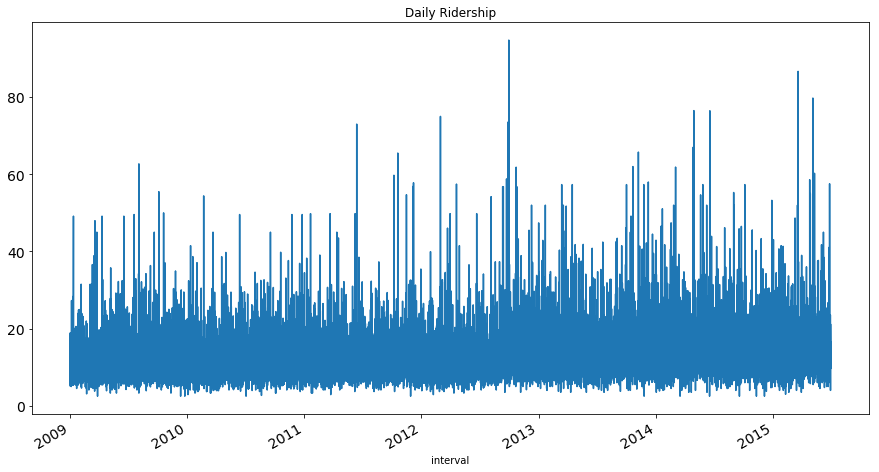

In [148]:
df.fare_amount.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14)

In [149]:
test.tail()

,fare_amount,distance,pickup_longitude,pickup_latitude,dropoff_latitude,dropoff_latitude,pickup_hour,pickup_month
interval,,,,,,,,
2015-06-30 19:17:00,9.653846,3.365400,-71.138077,39.185000,39.192348,39.192348,19.423077,6.0
2015-06-30 20:17:00,12.933333,5.198684,-73.971333,40.745333,40.747388,40.747388,20.533333,6.0
2015-06-30 21:17:00,16.556842,7.095467,-70.070000,38.613158,38.621968,38.621968,21.473684,6.0
2015-06-30 22:17:00,14.522500,4.562739,-70.894167,39.040417,39.036360,39.036360,22.375000,6.0
2015-06-30 23:17:00,12.625000,4.963497,-73.987500,40.747500,40.737871,40.737871,23.000000,6.0


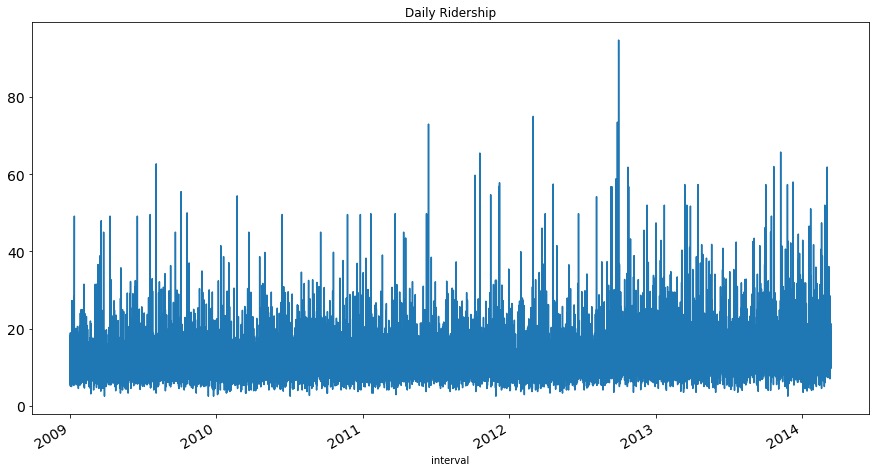

In [150]:
train.fare_amount.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14)

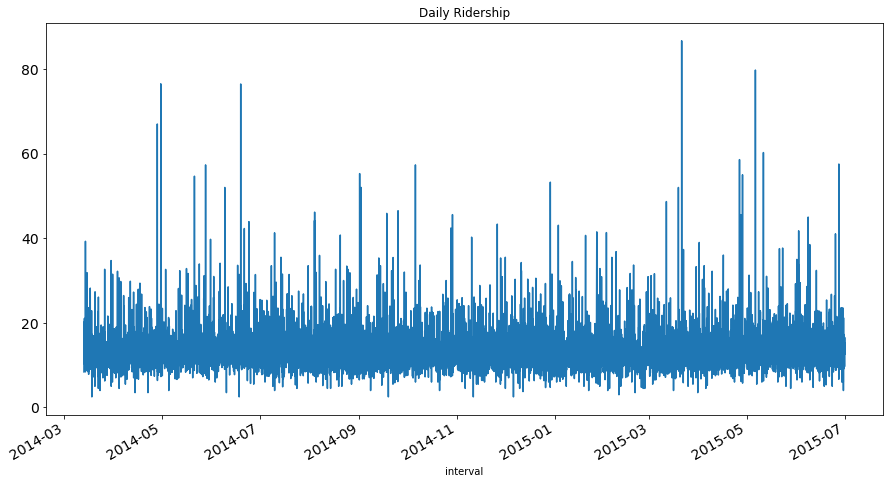

In [151]:
test.fare_amount.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14)

In [152]:
df.head()

,fare_amount,distance,pickup_longitude,pickup_latitude,dropoff_latitude,dropoff_latitude,pickup_hour,pickup_month
interval,,,,,,,,
2008-12-31 23:17:00,11.666667,6.226503,-73.975000,40.768333,40.773620,40.773620,0.000000,1.0
2009-01-01 00:17:00,9.666667,3.980113,-73.975333,40.754667,40.753529,40.753529,0.533333,1.0
2009-01-01 01:17:00,8.800000,3.161337,-73.984000,40.729000,40.740373,40.740373,1.600000,1.0
2009-01-01 02:17:00,12.811111,4.917250,-73.968889,40.763333,40.739729,40.739729,2.555556,1.0
2009-01-01 03:17:00,8.470000,3.011235,-73.989000,40.735000,40.739308,40.739308,3.600000,1.0


In [153]:
from sklearn.linear_model import LinearRegression

In [154]:
x_train = train.drop(['fare_amount'], axis=1)
x_test = test.drop(['fare_amount'], axis=1)
y_train = train[['fare_amount']]
y_test = test[['fare_amount']]

In [155]:
y_train= y_train.apply(np.int64)

In [157]:
x_train.shape

(45232, 7)

In [158]:
y_test= y_test.apply(np.int64)

In [159]:
from statsmodels.tsa.vector_ar.var_model import VAR


In [160]:
x_train.head()

,distance,pickup_longitude,pickup_latitude,dropoff_latitude,dropoff_latitude,pickup_hour,pickup_month
interval,,,,,,,
2008-12-31 23:17:00,6.226503,-73.975000,40.768333,40.773620,40.773620,0.000000,1.0
2009-01-01 00:17:00,3.980113,-73.975333,40.754667,40.753529,40.753529,0.533333,1.0
2009-01-01 01:17:00,3.161337,-73.984000,40.729000,40.740373,40.740373,1.600000,1.0
2009-01-01 02:17:00,4.917250,-73.968889,40.763333,40.739729,40.739729,2.555556,1.0
2009-01-01 03:17:00,3.011235,-73.989000,40.735000,40.739308,40.739308,3.600000,1.0


In [161]:
x_train.dtypes

distance            float64
pickup_longitude    float64
pickup_latitude     float64
dropoff_latitude    float64
dropoff_latitude    float64
pickup_hour         float64
pickup_month        float64
dtype: object

In [162]:
x_train.describe()

,distance,pickup_longitude,pickup_latitude,dropoff_latitude,dropoff_latitude,pickup_hour,pickup_month
count,45232.000000,45232.000000,45232.000000,45232.000000,45232.000000,45232.000000,45232.000000
mean,4.474415,-72.549530,39.933779,39.934022,39.934022,11.571634,6.343729
std,2.007874,3.586999,2.314521,2.313185,2.313185,6.528072,3.503525
min,0.000000,-74.882222,-36.242000,-36.187977,-36.187977,0.000000,1.000000
25%,3.332064,-73.980588,39.483984,39.484799,39.484799,6.294118,3.000000
50%,4.086274,-73.972500,40.746575,40.747209,40.747209,11.533333,6.000000
75%,5.078821,-71.670859,40.754286,40.755109,40.755109,17.368421,9.000000
max,35.807893,9.664000,56.420870,41.147453,41.147453,23.000000,12.000000


In [163]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [164]:
# Create linear regression object
regr = linear_model.LinearRegression()

In [165]:
regr.fit(x_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [166]:
x_test = x_test[np.isfinite(x_test['pickup_hour'])]
y_test = y_test[np.isfinite(y_test['fare_amount'])]

In [167]:
y_pred = regr.predict(x_test)


In [168]:
# The coefficients
print('Coefficients: \n', regr.coef_)

Coefficients: 
 [[ 1.63272132  0.16555712  0.42110719 -0.16059994 -0.16059994  0.02428985
   0.04998559]]


In [169]:
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

Mean squared error: 9.22
Variance score: 0.57


In [171]:
accuracy = regr.score(x_test,y_test)
print(accuracy*100,'%')

56.573635803694614 %


In [327]:
y_test['pred_amount'] = y_pred

In [328]:
y_test.head()

,fare_amount,pred_amount
interval,,
2014-03-13 05:17:00,8.400000,9.038386
2014-03-13 06:17:00,20.177333,16.184066
2014-03-13 07:17:00,13.171935,10.347191
2014-03-13 08:17:00,11.719787,10.032480
2014-03-13 09:17:00,10.413043,8.755182


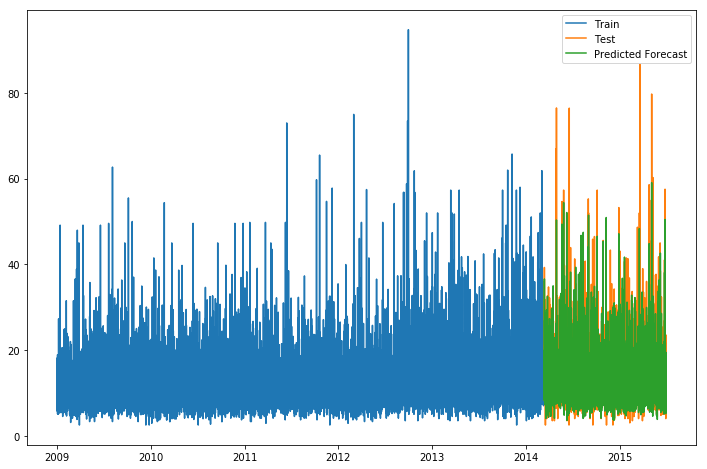

In [332]:
plt.figure(figsize=(12,8))
plt.plot(y_train['fare_amount'], label='Train')
plt.plot(y_test['fare_amount'], label='Test')
plt.plot(y_test['pred_amount'], label='Predicted Forecast')

plt.legend(loc='best')

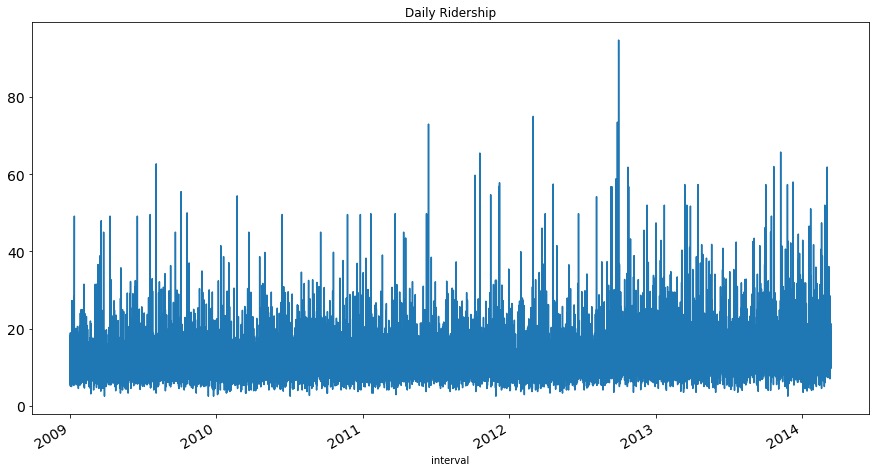

In [172]:
train.fare_amount.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14)

In [194]:
train.head()

,fare_amount,distance,pickup_longitude,pickup_latitude,dropoff_latitude,dropoff_latitude,pickup_hour,pickup_month
interval,,,,,,,,
2008-12-31 23:17:00,11.666667,6.226503,-73.975000,40.768333,40.773620,40.773620,0.000000,1.0
2009-01-01 00:17:00,9.666667,3.980113,-73.975333,40.754667,40.753529,40.753529,0.533333,1.0
2009-01-01 01:17:00,8.800000,3.161337,-73.984000,40.729000,40.740373,40.740373,1.600000,1.0
2009-01-01 02:17:00,12.811111,4.917250,-73.968889,40.763333,40.739729,40.739729,2.555556,1.0
2009-01-01 03:17:00,8.470000,3.011235,-73.989000,40.735000,40.739308,40.739308,3.600000,1.0


,fare_amount,distance,pickup_longitude,pickup_latitude,dropoff_latitude,dropoff_latitude
interval,,,,,,


In [360]:
train.fare_amount = train['fare_amount'].apply(np.int64)

In [336]:
train = train.resample(rule='60T', closed='left', label='left', base=17).mean()

In [ ]:
train = train[np.isfinite(train['fare_amount'])]


In [ ]:
train[train['fare_amount'].isnull()]

In [213]:
x_train = train.drop(['fare_amount','pickup_hour','pickup_month'], axis=1)
x_test = test.drop(['fare_amount','pickup_hour','pickup_month'], axis=1)
y_train = train[['fare_amount']]
y_test = test[['fare_amount']]

In [215]:
x_train.describe()

,distance,pickup_longitude,pickup_latitude,dropoff_latitude,dropoff_latitude
count,45232.000000,45232.000000,45232.000000,45232.000000,45232.000000
mean,4.474415,-72.549530,39.933779,39.934022,39.934022
std,2.007874,3.586999,2.314521,2.313185,2.313185
min,0.000000,-74.882222,-36.242000,-36.187977,-36.187977
25%,3.332064,-73.980588,39.483984,39.484799,39.484799
50%,4.086274,-73.972500,40.746575,40.747209,40.747209
75%,5.078821,-71.670859,40.754286,40.755109,40.755109
max,35.807893,9.664000,56.420870,41.147453,41.147453


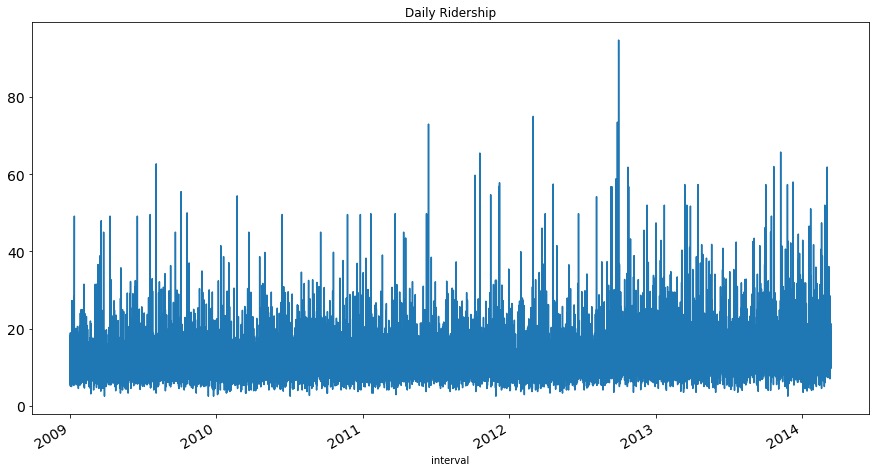

In [216]:
train.fare_amount.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14)

In [217]:
y_train.describe()

,fare_amount
count,45232.000000
mean,11.309016
std,3.972370
min,2.500000
25%,9.031250
50%,10.566667
75%,12.570588
max,94.766667


In [218]:
# Create linear regression object
regr = linear_model.LinearRegression()

In [219]:
regr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [220]:
x_test.head()

,distance,pickup_longitude,pickup_latitude,dropoff_latitude,dropoff_latitude
interval,,,,,
2014-03-13 05:17:00,3.788830,-73.990000,40.744000,40.754681,40.754681
2014-03-13 06:17:00,7.464251,-73.962667,40.746667,40.725717,40.725717
2014-03-13 07:17:00,4.220028,-73.982258,40.752903,40.756682,40.756682
2014-03-13 08:17:00,3.798852,-73.972553,40.750638,40.756855,40.756855
2014-03-13 09:17:00,3.039036,-73.983913,40.753043,40.758640,40.758640


In [221]:
y_pred

array([ 7.85, 15.85, 10.65, ..., 16.3 , 10.65, 11.35])

In [222]:
y_pred = regr.predict(x_test)

In [320]:
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

Mean squared error: 9.10
Variance score: 0.57


In [321]:
accuracy = regr.score(x_test,y_test)
print(accuracy*100,'%')

56.78548495379063 %


In [324]:
y_hat_avg = y_test.copy()

In [325]:
y_hat_avg['t_fare_amount'] = y_test

In [326]:
y_hat_avg.head()

,fare_amount,t_fare_amount
interval,,
2014-03-13 05:17:00,8.400000,8.400000
2014-03-13 06:17:00,20.177333,20.177333
2014-03-13 07:17:00,13.171935,13.171935
2014-03-13 08:17:00,11.719787,11.719787
2014-03-13 09:17:00,10.413043,10.413043


In [322]:
from sklearn.ensemble import RandomForestRegressor


In [227]:
regressor = RandomForestRegressor(n_estimators=20, random_state=0)  


In [228]:
regressor.fit(x_train, y_train)  
y_pred = regressor.predict(x_test) 

C:\Users\user\Anaconda\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



In [229]:
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

Mean squared error: 9.10
Variance score: 0.57


In [230]:
accuracy = regressor.score(x_test,y_test)
print(accuracy*100,'%')

56.985328568964974 %


In [231]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error

In [232]:
y_train.head()

,fare_amount
interval,
2008-12-31 23:17:00,11.666667
2009-01-01 00:17:00,9.666667
2009-01-01 01:17:00,8.800000
2009-01-01 02:17:00,12.811111
2009-01-01 03:17:00,8.470000


In [233]:
# train autoregression
model = AR(y_train)

C:\Users\user\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



In [234]:
model_fit = model.fit()


In [235]:
print('Lag: %s' % model_fit.k_ar)


Lag: 55


In [236]:
print('Coefficients: %s' % model_fit.params)


Coefficients: const              1.878941
L1.fare_amount     0.079938
L2.fare_amount     0.024428
L3.fare_amount     0.006988
L4.fare_amount     0.017058
L5.fare_amount     0.008038
L6.fare_amount     0.006353
L7.fare_amount     0.009845
L8.fare_amount     0.015025
L9.fare_amount     0.011915
L10.fare_amount    0.021742
L11.fare_amount    0.022521
L12.fare_amount    0.017033
L13.fare_amount    0.017238
L14.fare_amount    0.004769
L15.fare_amount    0.010604
L16.fare_amount    0.004856
L17.fare_amount    0.005995
L18.fare_amount    0.002878
L19.fare_amount    0.005548
L20.fare_amount   -0.001570
L21.fare_amount    0.006955
L22.fare_amount    0.030746
L23.fare_amount    0.058837
L24.fare_amount    0.071601
L25.fare_amount    0.057225
L26.fare_amount    0.012078
L27.fare_amount    0.000751
L28.fare_amount    0.003475
L29.fare_amount    0.002350
L30.fare_amount    0.001035
L31.fare_amount   -0.001923
L32.fare_amount   -0.005846
L33.fare_amount    0.001371
L34.fare_amount    0.003887
L35.fa

In [237]:
predictions = model_fit.predict(start=len(y_train), end=len(y_train)+len(y_test)-1, dynamic=False)


C:\Users\user\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:531: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



In [238]:
y_test.reset_index()["fare_amount"][1]


20.17733333333333

In [239]:
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], y_test["fare_amount"][i]))

KeyError: 0

In [426]:
from matplotlib import pyplot


In [432]:
y_test.reset_index().head()

,interval,fare_amount
0,2013-12-07 16:00:00,6.5
1,2013-02-16 15:30:00,7.5
2,2009-01-17 15:15:00,4.1
3,2013-04-06 15:30:00,12.5
4,2014-11-01 20:45:00,6.0


Test MSE: 96.332


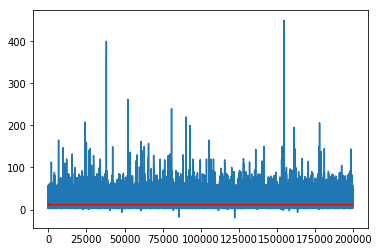

In [433]:
error = mean_squared_error(y_test, predictions)
print('Test MSE: %.3f' % error)
# plot results
pyplot.plot(y_test.reset_index()["fare_amount"])
pyplot.plot(predictions, color='red')
pyplot.show()

In [274]:
var_train.head()

,fare_amount,distance,pickup_longitude,pickup_latitude,dropoff_latitude,dropoff_latitude
interval,,,,,,
2009-06-15 17:15:00,4.5,0.994348,-73.84,40.72,40.712278,40.712278
2009-08-03 23:00:00,4.5,1.333581,-73.99,40.76,40.768142,40.768142
2011-07-11 13:00:00,10.9,5.648338,-73.99,40.75,40.718000,40.718000
2012-12-17 22:45:00,29.0,11.774684,-73.98,40.77,40.677382,40.677382
2011-02-28 22:00:00,6.1,2.811899,-74.00,40.73,40.721325,40.721325


In [182]:
var_train = train.drop(['interval'], axis=1)
var_test = test.drop(['interval'], axis=1)

KeyError: "['interval'] not found in axis"

In [240]:
model = VAR(endog=train)


C:\Users\user\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



In [241]:
model_fit = model.fit()


In [242]:
prediction = model_fit.forecast(model_fit.y, steps=len(y_test))

In [243]:
prediction[100]

array([ 11.03744287,   4.40560039, -72.53593626,  39.91476329,
        39.91509117,  39.91509117,  11.58228167,   3.12583687])

In [244]:
cols=train.columns.values

In [245]:
#converting predictions to dataframe
pred = pd.DataFrame(index=range(0,len(prediction)),columns=[cols])
for j in range(0,6):
    for i in range(0, len(prediction)):
       pred.iloc[i][j] = prediction[i][j]



In [246]:
import math

In [247]:
pred.isnull().any()

fare_amount         False
distance            False
pickup_longitude    False
pickup_latitude     False
dropoff_latitude    False
dropoff_latitude    False
pickup_hour          True
pickup_month         True
dtype: bool

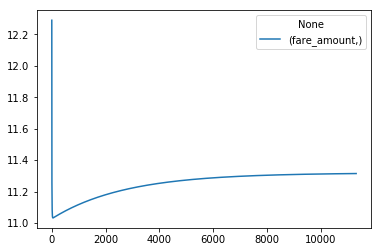

In [248]:
pred['fare_amount'].plot()

In [251]:
print('rmse value for', i, 'is : ', math.sqrt(mean_squared_error(pred['fare_amount'], test['fare_amount'])))

rmse value for pickup_hour is :  5.09378492011544


In [250]:
#check rmse
for i in cols:
    print('rmse value for', i, 'is : ', math.sqrt(mean_squared_error(pred[i], test[i])))

rmse value for fare_amount is :  5.09378492011544
rmse value for distance is :  2.1863567815229965
rmse value for pickup_longitude is :  3.3300755692223434
rmse value for pickup_latitude is :  1.835902496898132
rmse value for dropoff_latitude is :  1.8358778770276316
rmse value for dropoff_latitude is :  1.8358778770276316


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
#converting predictions to dataframe
pred = pd.DataFrame(index=range(0,len(prediction)),columns=[cols])
for j in range(0,13):
    for i in range(0, len(prediction)):
       pred.iloc[i][j] = prediction[i][j]

#check rmse
for i in cols:
    print('rmse value for', i, 'is : ', sqrt(mean_squared_error(pred[i], valid[i])))

In [315]:
 pred.index = y_hat_avg.index

In [316]:
y_hat_avg["t_fare_amount"] = pred["fare_amount"]

In [317]:
y_hat_avg.head()

,fare_amount,distance,pickup_longitude,pickup_latitude,dropoff_latitude,dropoff_latitude,pickup_hour,pickup_month,t_fare_amount
interval,,,,,,,,,
2014-03-13 05:17:00,8.400000,3.788830,-73.990000,40.744000,40.754681,40.754681,5.600000,3.0,12.2906
2014-03-13 06:17:00,20.177333,7.464251,-73.962667,40.746667,40.725717,40.725717,6.333333,3.0,11.6671
2014-03-13 07:17:00,13.171935,4.220028,-73.982258,40.752903,40.756682,40.756682,7.516129,3.0,11.4408
2014-03-13 08:17:00,11.719787,3.798852,-73.972553,40.750638,40.756855,40.756855,8.531915,3.0,11.3467
2014-03-13 09:17:00,10.413043,3.039036,-73.983913,40.753043,40.758640,40.758640,9.391304,3.0,11.2927


In [307]:
y_hat_avg = test.copy()


In [310]:
y_hat_avg.head()

,fare_amount,distance,pickup_longitude,pickup_latitude,dropoff_latitude,dropoff_latitude,pickup_hour,pickup_month
interval,,,,,,,,
2014-03-13 05:17:00,8.400000,3.788830,-73.990000,40.744000,40.754681,40.754681,5.600000,3.0
2014-03-13 06:17:00,20.177333,7.464251,-73.962667,40.746667,40.725717,40.725717,6.333333,3.0
2014-03-13 07:17:00,13.171935,4.220028,-73.982258,40.752903,40.756682,40.756682,7.516129,3.0
2014-03-13 08:17:00,11.719787,3.798852,-73.972553,40.750638,40.756855,40.756855,8.531915,3.0
2014-03-13 09:17:00,10.413043,3.039036,-73.983913,40.753043,40.758640,40.758640,9.391304,3.0


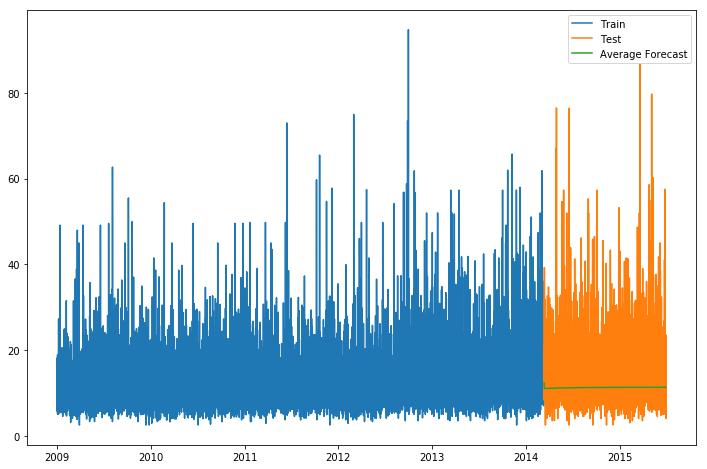

In [319]:
plt.figure(figsize=(12,8))
plt.plot(train['fare_amount'], label='Train')
plt.plot(test['fare_amount'], label='Test')
plt.plot(y_hat_avg['t_fare_amount'], label='Average Forecast')

plt.legend(loc='best')

In [ ]:
y_hat_avg

In [253]:
y_hat_avg = test.copy()
y_hat_avg['t_fare_amount'] = train['fare_amount'].mean()

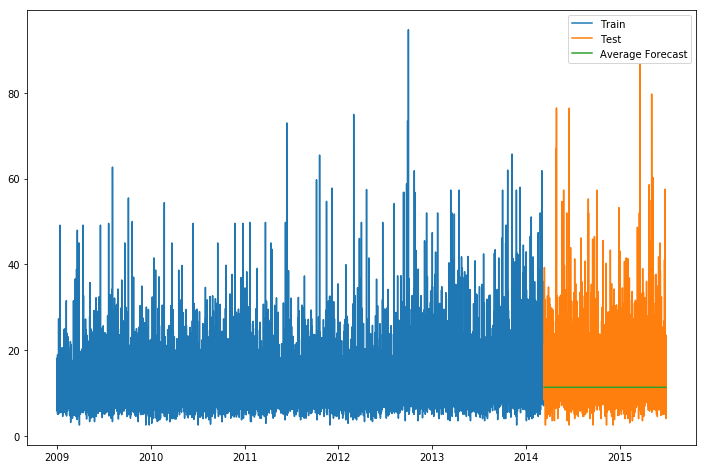

In [254]:
plt.figure(figsize=(12,8))
plt.plot(train['fare_amount'], label='Train')
plt.plot(test['fare_amount'], label='Test')
plt.plot(y_hat_avg['t_fare_amount'], label='Average Forecast')
plt.legend(loc='best')

In [422]:
df1 = df.copy()

In [423]:
df1['moving_avg_forecast'] = df['fare_amount'].rolling(60).mean()

In [439]:
y_hat_avg = test.copy()

In [433]:
train_size = int(len(df1) * 0.80)
train, test = df1[0:train_size], df1[train_size:len(df)]

In [436]:
test.head()

,fare_amount,id,moving_avg_forecast
interval,,,
2014-03-13 14:17:00,10.741500,45544,NaN
2014-03-13 15:17:00,12.135000,45545,NaN
2014-03-13 16:17:00,14.221905,45546,NaN
2014-03-13 17:17:00,10.644783,45547,NaN
2014-03-13 18:17:00,13.266571,45548,NaN


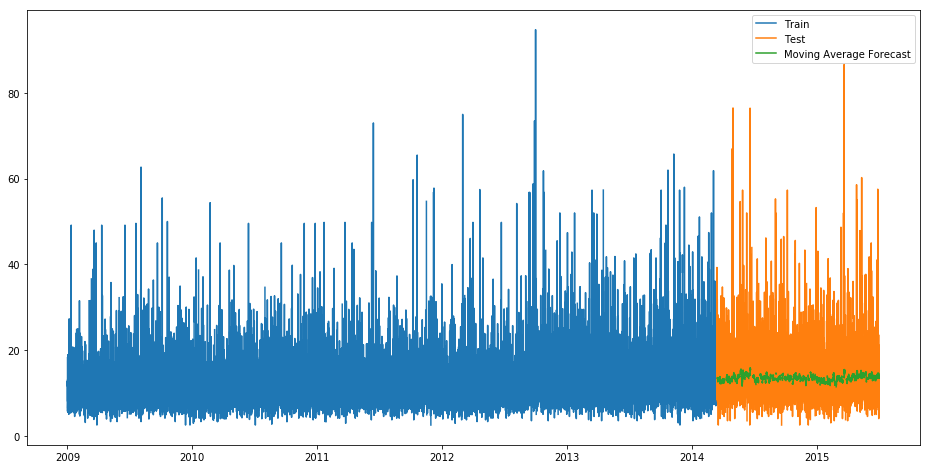

In [440]:
plt.figure(figsize=(16,8))
plt.plot(train['fare_amount'], label='Train')
plt.plot(test['fare_amount'], label='Test')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast')
plt.legend(loc='best')

In [381]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [378]:
train['fare_amount'].isnull().sum()

0

In [382]:
train['fare_amount'].fillna(train['fare_amount'].mean())

interval
2008-12-31 23:17:00    11
2009-01-01 00:17:00     9
2009-01-01 01:17:00     8
2009-01-01 02:17:00    12
2009-01-01 03:17:00     8
2009-01-01 04:17:00     8
2009-01-01 05:17:00     8
2009-01-01 07:17:00    18
2009-01-01 08:17:00     5
2009-01-01 09:17:00    16
2009-01-01 10:17:00     9
2009-01-01 11:17:00    11
2009-01-01 12:17:00    10
2009-01-01 13:17:00    10
2009-01-01 14:17:00     7
2009-01-01 15:17:00     7
2009-01-01 16:17:00     7
2009-01-01 17:17:00    13
2009-01-01 18:17:00    11
2009-01-01 19:17:00    11
2009-01-01 20:17:00     6
2009-01-01 21:17:00     8
2009-01-01 22:17:00     8
2009-01-01 23:17:00    12
2009-01-02 00:17:00     7
2009-01-02 01:17:00    12
2009-01-02 02:17:00    11
2009-01-02 04:17:00    10
2009-01-02 05:17:00    18
2009-01-02 06:17:00     5
                       ..
2015-06-29 18:17:00    15
2015-06-29 19:17:00     9
2015-06-29 20:17:00    10
2015-06-29 21:17:00     9
2015-06-29 22:17:00     9
2015-06-29 23:17:00    11
2015-06-30 00:17:00     6
201

In [383]:
# create class
model = SimpleExpSmoothing(train['fare_amount'])

C:\Users\user\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



In [384]:
# fit model
model_fit = model.fit(smoothing_level=0.6,optimized=False)

In [385]:
y_hat_avg = test.copy()

In [386]:
model_fit.forecast(len(test['fare_amount'])-100)

C:\Users\user\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:531: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



48696     12.820929
48697     12.820929
48698     12.820929
48699     12.820929
48700     12.820929
48701     12.820929
48702     12.820929
48703     12.820929
48704     12.820929
48705     12.820929
48706     12.820929
48707     12.820929
48708     12.820929
48709     12.820929
48710     12.820929
48711     12.820929
48712     12.820929
48713     12.820929
48714     12.820929
48715     12.820929
48716     12.820929
48717     12.820929
48718     12.820929
48719     12.820929
48720     12.820929
48721     12.820929
48722     12.820929
48723     12.820929
48724     12.820929
48725     12.820929
            ...    
248106    12.820929
248107    12.820929
248108    12.820929
248109    12.820929
248110    12.820929
248111    12.820929
248112    12.820929
248113    12.820929
248114    12.820929
248115    12.820929
248116    12.820929
248117    12.820929
248118    12.820929
248119    12.820929
248120    12.820929
248121    12.820929
248122    12.820929
248123    12.820929
248124    12.820929


In [387]:
y_hat_avg['SES']

KeyError: 'SES'

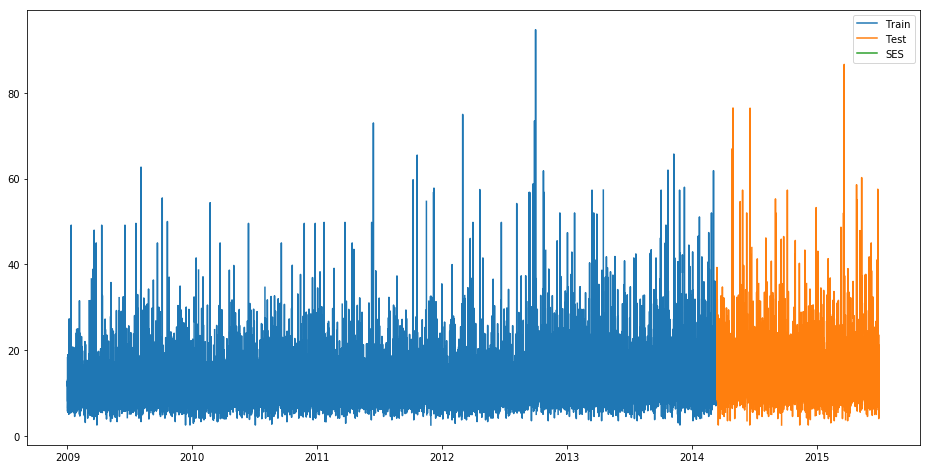

In [446]:
plt.figure(figsize=(16,8))
plt.plot(train['fare_amount'], label='Train')
plt.plot(test['fare_amount'], label='Test')
plt.plot(y_hat_avg['SES'], label='SES')
plt.legend(loc='best')